**Name**: Aman Shaikh
**Div**: F
**Roll No**: 02

# Task
Perform K-Means clustering on the 'Annual Income (k$)' and 'Spending Score (1-100)' features from the "Mall_Customers.csv" dataset. Determine the optimal number of clusters using the Elbow Method and visualize the WCSS against K. Then, apply K-Means with the optimal K, visualize the clustered data with distinct colors for each cluster and marked cluster centers, and summarize the insights gained from the clustering.

## Load Dataset

### Subtask:
Load the `Mall_Customers.csv` dataset into a pandas DataFrame.


In [1]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Select Features

### Subtask:
Select 'Annual Income (k$)' and 'Spending Score (1-100)' as the features for K-Means clustering.


In [2]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Determine Optimal K (Elbow Method)



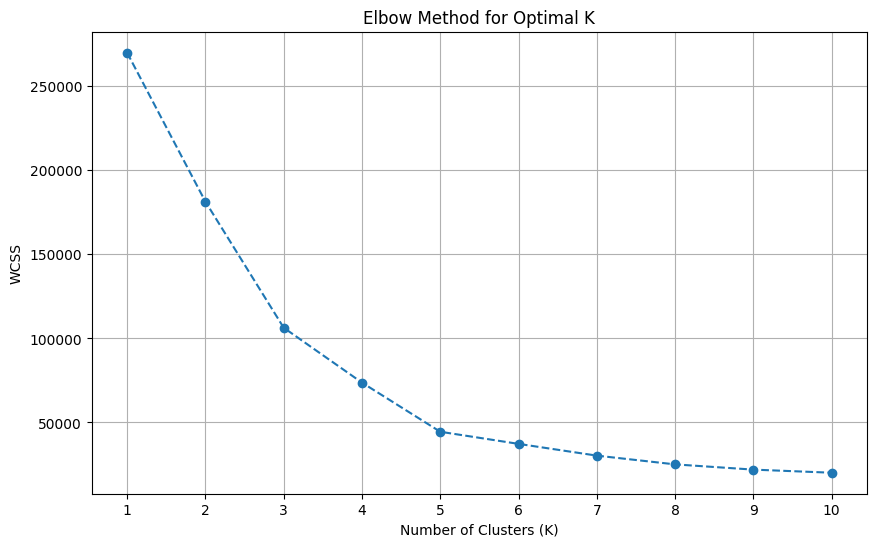

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## Apply K-Means Clustering



In [4]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)
X['Cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Labels:")
print(X['Cluster'].value_counts())
print("\nCluster Centers:")
print(centers)

Cluster Labels:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


/tmp/ipython-input-958346181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


In [5]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)
X.loc[:, 'Cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Labels:")
print(X['Cluster'].value_counts())
print("\nCluster Centers:")
print(centers)

Cluster Labels:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Cluster Centers:
[[ 5.52962963e+01  4.95185185e+01 -1.99840144e-15]
 [ 8.65384615e+01  8.21282051e+01  1.00000000e+00]
 [ 2.57272727e+01  7.93636364e+01  2.00000000e+00]
 [ 8.82000000e+01  1.71142857e+01  3.00000000e+00]
 [ 2.63043478e+01  2.09130435e+01  4.00000000e+00]]


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)
X.loc[:, 'Cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Labels:")
print(X['Cluster'].value_counts())
print("\nCluster Centers:")
print(centers)


Cluster Labels:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


## Visualize Clustered Data




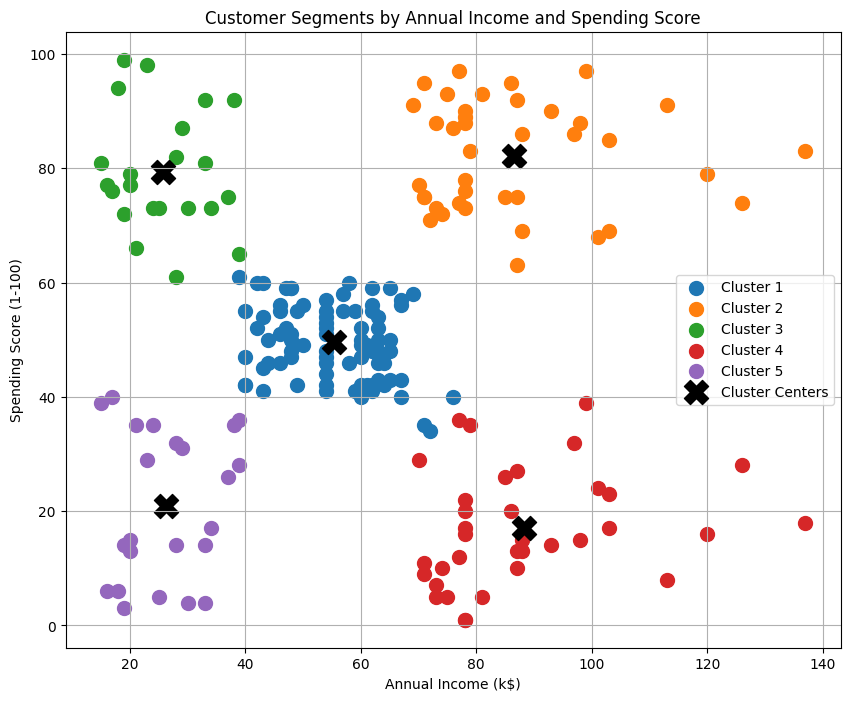

In [7]:
plt.figure(figsize=(10, 8))

# Plotting the clusters
for i in range(optimal_k):
    plt.scatter(
        X[X['Cluster'] == i]['Annual Income (k$)'],
        X[X['Cluster'] == i]['Spending Score (1-100)'],
        s=100, label=f'Cluster {i+1}'
    )

# Plotting the cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=300, c='black', marker='X', label='Cluster Centers'
)

plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()